In [144]:
from copy import deepcopy
from typing import List

import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

from src.models.geometric_figure import GeometricFigure
from src.services.geometric_figure import (get_geometric_figures,
                                           get_input_and_output,
                                           plot_geometric_figures,
                                           prediction_to_category)

In [145]:
IMAGE_SIZE = (512, 512)
TEST_RATIO = 0.2
DATA_VERSION = '2023-03-22'

In [146]:
geometric_figures: List[GeometricFigure] = get_geometric_figures(f'data/{DATA_VERSION}', IMAGE_SIZE, memorize=True)
print(f'Loaded {len(geometric_figures)} geometric figures')

Loaded 300 geometric figures


In [147]:
shuffled_geometric_figures: List[GeometricFigure] = deepcopy(geometric_figures)
np.random.shuffle(shuffled_geometric_figures)

x, y = zip(*[get_input_and_output(gf) for gf in shuffled_geometric_figures])
x = np.array(x)
y = np.array(y)

test_size = int(len(x) * TEST_RATIO)
x_train, x_test = x[:-test_size], x[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

In [148]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    keras.layers.Lambda(lambda x: x[..., 1:2]),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [149]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_7 (Lambda)            (None, 512, 512, 1)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               33554560  
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_63 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_64 (Dense)             (None, 3)                 99        
Total params: 33,564,995
Trainable params: 33,564,995
Non-trainable params: 0
_________________________________________

In [150]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 2s 140ms/step - loss: 28.4253 - accuracy: 0.3417
Epoch 2/20
8/8 [==============================] - 1s 139ms/step - loss: 23.1081 - accuracy: 0.3333
Epoch 3/20
8/8 [==============================] - 1s 153ms/step - loss: 8.4080 - accuracy: 0.3375
Epoch 4/20
8/8 [==============================] - 1s 161ms/step - loss: 3.5337 - accuracy: 0.5208
Epoch 5/20
8/8 [==============================] - 1s 150ms/step - loss: 3.9050 - accuracy: 0.4875
Epoch 6/20
8/8 [==============================] - 1s 141ms/step - loss: 3.2051 - accuracy: 0.5375
Epoch 7/20
8/8 [==============================] - 1s 149ms/step - loss: 1.6191 - accuracy: 0.5917
Epoch 8/20
8/8 [==============================] - 1s 145ms/step - loss: 1.9935 - accuracy: 0.5958
Epoch 9/20
8/8 [==============================] - 1s 137ms/step - loss: 2.5108 - accuracy: 0.5375
Epoch 10/20
8/8 [==============================] - 1s 135ms/step - loss: 1.3612 - accuracy: 0.6208
Epoch 11/20
8/8 [

In [151]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 32ms/step - loss: 0.4154 - accuracy: 0.8667


[0.41536369919776917, 0.8666666746139526]

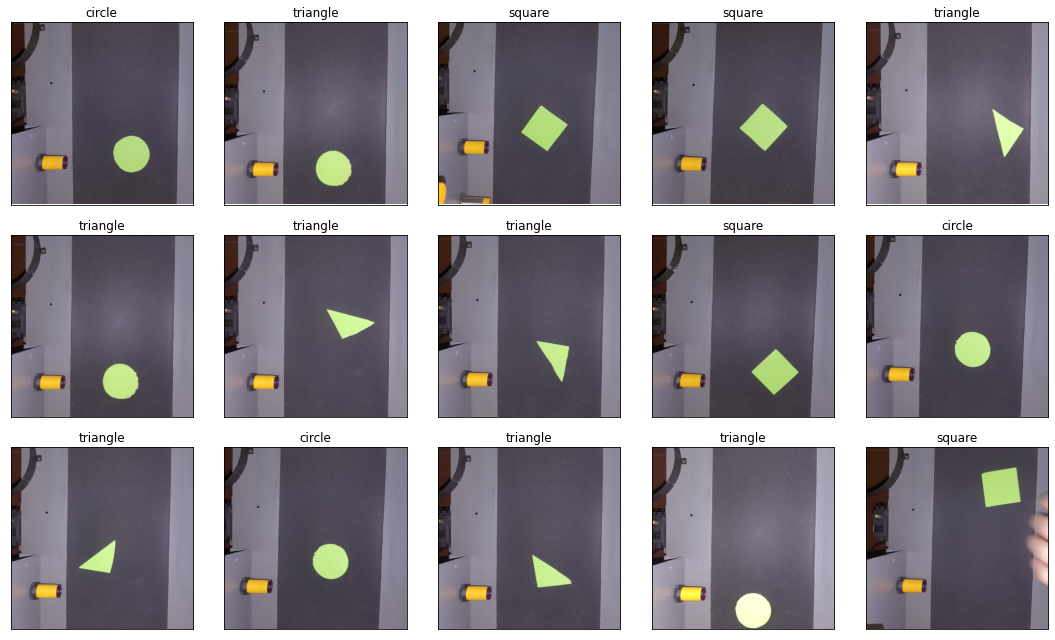

In [152]:
number_of_plots = 15
random_geometric_figures = deepcopy([geometric_figures[i] for i in np.random.randint(0, len(geometric_figures), number_of_plots)])
for gf in random_geometric_figures:
    x, y = get_input_and_output(gf)
    x = np.expand_dims(x, axis=0)
    y_pred = model.predict(x)
    category = prediction_to_category(y_pred)
    gf['category'] = category
plot_geometric_figures(random_geometric_figures, columns=5, plot_size=3)
plt.show()

In [153]:
model.save('data/geometric_figure_classifier.h5')